In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('test.ft.txt', delimiter='\t', header=None, names=['sentiment', 'reviewText'])

# Preview the first few rows
print(df.head())


                                           sentiment  reviewText
0  __label__2 Great CD: My lovely Pat has one of ...         NaN
1  __label__2 One of the best game music soundtra...         NaN
2  __label__1 Batteries died within a year ...: I...         NaN
3  __label__2 works fine, but Maha Energy is bett...         NaN
4  __label__2 Great for the non-audiophile: Revie...         NaN


In [3]:
# Read the file
with open('test.ft.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize lists to hold the labels and reviews
sentiments = []
reviews = []

# Process each line
for line in lines:
    # Split by space and remove label from the start
    parts = line.strip().split(' ', 1)  # Only split on the first space
    if len(parts) == 2:  # Ensure we have both sentiment and review text
        sentiments.append(parts[0])  # sentiment label
        reviews.append(parts[1])  # review text

# Create a DataFrame
df = pd.DataFrame({'sentiment': sentiments, 'reviewText': reviews})

# Convert sentiment labels to binary (assuming 1 for positive and 0 for negative)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if '__label__2' in x else 0)

# Preview the cleaned DataFrame
print(df.head())


   sentiment                                         reviewText
0          1  Great CD: My lovely Pat has one of the GREAT v...
1          1  One of the best game music soundtracks - for a...
2          0  Batteries died within a year ...: I bought thi...
3          1  works fine, but Maha Energy is better: Check o...
4          1  Great for the non-audiophile: Reviewed quite a...


Next Steps for Your Sentiment Analysis Project
Now that your data is ready, you can proceed with the following steps:
-----------------------------------------------------------------------------

1. Data Preprocessing
   -----------------------------------------------------------------------------

You'll need to clean the review text to prepare it for modeling. Common preprocessing steps include:
-----------------------------------------------------------------------------

Lowercasing
Removing punctuation
Removing stop words
Tokenization
Lemmatization or stemming
-----------------------------------------------------------------------------

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run this once)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the reviewText column
df['cleaned_reviewText'] = df['reviewText'].apply(preprocess_text)

# Check the DataFrame to see if the column was added
print(df[['reviewText', 'cleaned_reviewText']].head())


                                          reviewText  \
0  Great CD: My lovely Pat has one of the GREAT v...   
1  One of the best game music soundtracks - for a...   
2  Batteries died within a year ...: I bought thi...   
3  works fine, but Maha Energy is better: Check o...   
4  Great for the non-audiophile: Reviewed quite a...   

                                  cleaned_reviewText  
0  great cd lovely pat one great voice generation...  
1  one best game music soundtrack game didnt real...  
2  battery died within year bought charger jul 20...  
3  work fine maha energy better check maha energy...  
4  great nonaudiophile reviewed quite bit combo p...  


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_reviewText']).toarray()
y = df['sentiment'].values  # Target variable (sentiment labels)

# Check the shape of the features
print(X.shape)  # Should give you (number of samples, number of features)


(400000, 5000)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (320000, 5000), Testing data shape: (80000, 5000)


In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           0       0.89      0.88      0.88     39896
           1       0.88      0.89      0.89     40104

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000

Confusion Matrix:
 [[35082  4814]
 [ 4360 35744]]
Accuracy: 0.8853


now for out own strings
------------------------
Step 1: Create a Function for Preprocessing
Step 2: Create a Function for Making Predictions



In [21]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text


In [28]:
def predict_sentiment(input_text):
    # Preprocess the input text
    cleaned_text = preprocess_text(input_text)
    
    # Vectorize the cleaned text
    text_vector = tfidf.transform([cleaned_text]).toarray()  # Use the same TF-IDF vectorizer
    
    # Make a prediction
    prediction = logistic_model.predict(text_vector)  # Use the trained model (e.g., logistic_model)
    
    # Return the result
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment


In [30]:
input_string = "This product is amazing! I loved it."
result = predict_sentiment(input_string)
print(f"Sentiment: {result}")


Sentiment: Positive


In [32]:
input_string = "The battery life is terrible, very disappointed!"
result = predict_sentiment(input_string)
print(f"Sentiment: {result}")


Sentiment: Negative


creating visualizations for our project now
--------------------------------------------

/var/folders/03/f_3hssr15d79dbq0j2wfkkn80000gn/T/ipykernel_10564/992754794.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


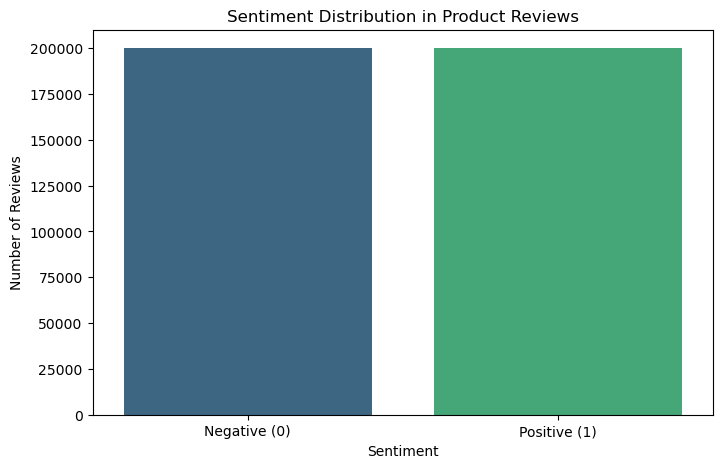

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution in Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.show()


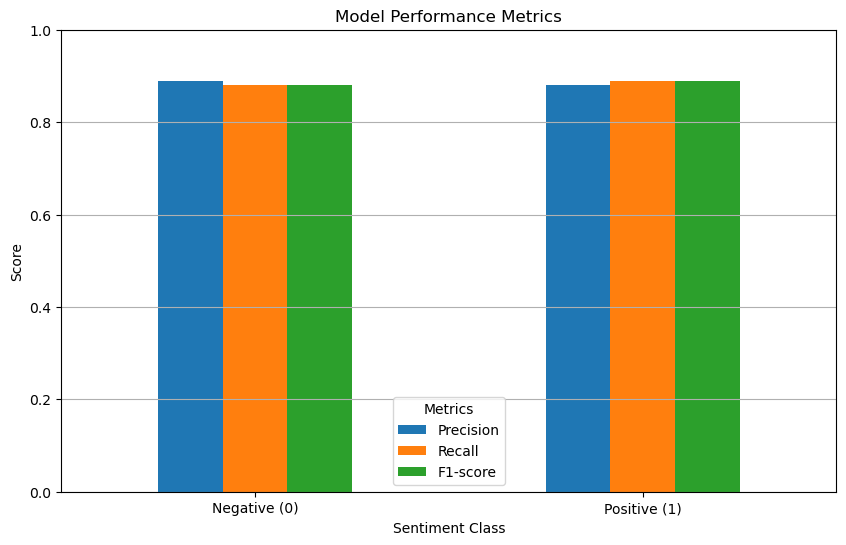

In [37]:
# Model performance metrics
metrics = {
    'Precision': [0.89, 0.88],
    'Recall': [0.88, 0.89],
    'F1-score': [0.88, 0.89],
}

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics, index=['Negative (0)', 'Positive (1)'])

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Sentiment Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


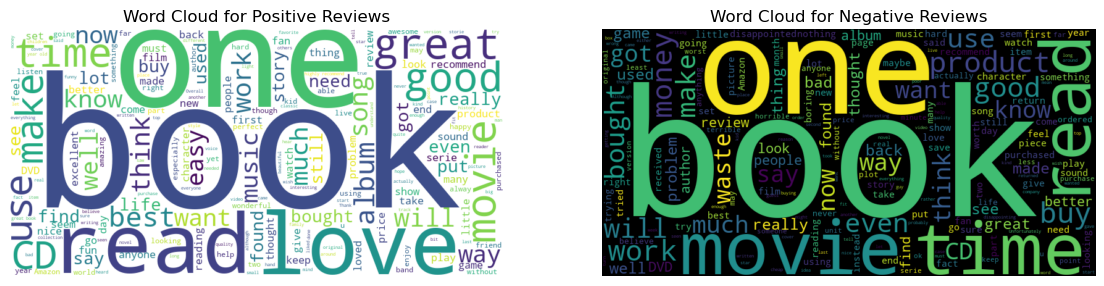

In [41]:
from wordcloud import WordCloud

# Create a word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['reviewText'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Create a word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['reviewText'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plotting the word clouds
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

plt.show()


In [45]:
from joblib import dump

# Save the model
dump(logistic_model, 'sentiment_analysis_model.joblib')


['sentiment_analysis_model.joblib']

In [47]:
from joblib import load

# Load the model
logistic_model = load('sentiment_analysis_model.joblib')


In [51]:
input_string = "This product is amazing! I loved it."
result = predict_sentiment(input_string)
print(f"Sentiment: {result}")


Sentiment: Positive
